<a href="https://colab.research.google.com/github/Jasmeet0810/Customer-Segmentation-Using-K-Means-Clustering/blob/main/Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [56]:
df = pd.read_csv("/content/AmesHousing.csv")
df.columns
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [57]:
# Check column names and clean if needed
df.columns = df.columns.str.strip()

# Drop rows with missing values in selected columns
selected_columns = [
    'Gr Liv Area', 'Bedroom AbvGr', 'Full Bath', 'Half Bath',
    'TotRms AbvGrd', 'Fireplaces', 'Garage Cars', 'Garage Area',
    '1st Flr SF', '2nd Flr SF', 'Overall Qual', 'Year Built', 'SalePrice'
]

df = df[selected_columns].dropna()

X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

In [58]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [59]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model = LinearRegression()
model.fit(X_train_poly, y_train)

y_pred = model.predict(X_test_poly)

r2 = r2_score(y_test, y_pred)
print(f" Polynomial Linear Regression R² Score: {r2:.4f} ({r2*100:.2f}%)")


 Polynomial Linear Regression R² Score: 0.8916 (89.16%)


In [64]:
# Standardize before polynomial
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Polynomial transformation
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Ridge Regression
ridge_model = Ridge(alpha=10.0)
ridge_model.fit(X_train_poly, y_train)

y_pred_ridge = ridge_model.predict(X_test_poly)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Ridge Regression R² Score: {r2_ridge:.4f} ({r2_ridge*100:.2f}%)")


Ridge Regression R² Score: 0.8933 (89.33%)


In [65]:
def evaluate_model(y_true, y_pred, model_name="Model"):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"\n📈 {model_name} Evaluation:")
    print(f"R² Score       : {r2:.4f} ({r2*100:.2f}%)")
    print(f"Mean Squared Error : {mse:.2f}")
    print(f"Mean Absolute Error: {mae:.2f}")

evaluate_model(y_test, y_pred, "Polynomial Linear Regression")
evaluate_model(y_test, y_pred_ridge, "Ridge Regression")



📈 Polynomial Linear Regression Evaluation:
R² Score       : 0.8916 (89.16%)
Mean Squared Error : 816825268.95
Mean Absolute Error: 19375.63

📈 Ridge Regression Evaluation:
R² Score       : 0.8933 (89.33%)
Mean Squared Error : 803783644.03
Mean Absolute Error: 19291.40


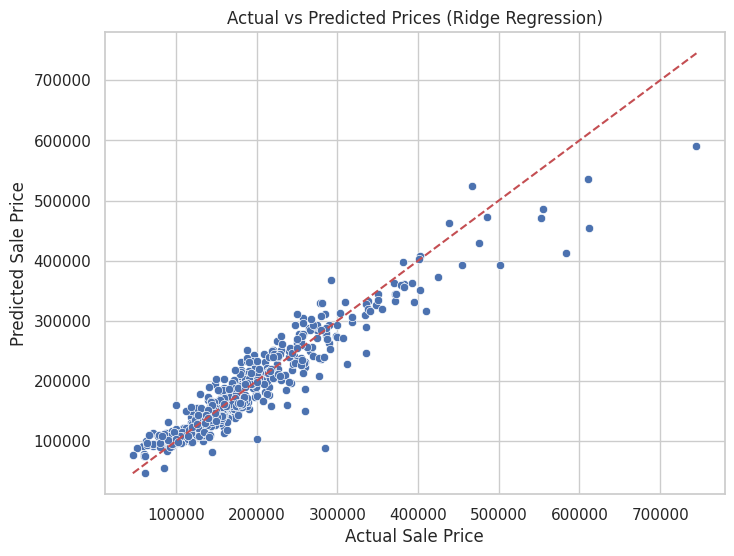

In [66]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred_ridge)
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Actual vs Predicted Prices (Ridge Regression)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()
